# Importing Necessary Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from datetime import date
# ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from datetime import datetime

# Import label encoder 
from sklearn import preprocessing

# SVM
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

# logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Random forest
from sklearn.ensemble import RandomForestClassifier  


# scaling features
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler

# knn
from sklearn.neighbors import KNeighborsClassifier  
import math

from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc

# Importing the data

In [2]:
data = pd.read_csv('churn_incorporation.csv')

In [3]:
data.head()

,Customer_ID,Gender,Age,Lifetime_data_usage,Date_of_registration,Churn_date,Churn,Lifetime_money_spent,Plans_switch,Dependents,Plan_type,last_plan_used
0,81076390601,female,57,5616,31-08-2018,NaN,0,31837,2,1,Postpaid,27
1,53297743644,female,38,3700,31-08-2018,03-05-2023,1,26854,2,1,Postpaid,27
2,56864064722,male,40,4368,31-08-2018,NaN,0,25148,2,1,Prepaid,24
3,21358509485,male,39,1684,31-08-2018,14-12-2020,1,9226,2,1,Prepaid,22
4,38720643973,female,19,4816,31-08-2018,NaN,0,27130,3,1,Prepaid,10


# Getting to know the data

In [4]:
data.describe()

,Customer_ID,Age,Churn,Lifetime_money_spent,Plans_switch,Dependents,last_plan_used
count,2.000000e+03,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.533354e+10,41.522500,0.2415,22069.756500,2.227000,1.178000,14.961500
std,2.581961e+10,13.805535,0.4281,10564.463142,0.790432,0.734565,9.267576
min,1.001909e+10,18.000000,0.0000,349.000000,1.000000,1.000000,1.000000
25%,3.391568e+10,29.000000,0.0000,15900.250000,2.000000,1.000000,7.000000
50%,5.505285e+10,41.000000,0.0000,21240.000000,2.000000,1.000000,14.000000
75%,7.853206e+10,54.000000,0.0000,26113.500000,2.000000,1.000000,23.000000
max,9.999142e+10,65.000000,1.0000,85461.000000,5.000000,5.000000,33.000000


In [5]:
data.describe(include="object")

,Gender,Lifetime_data_usage,Date_of_registration,Churn_date,Plan_type
count,2000,2000,2000,483,2000
unique,2,1158,801,427,2
top,female,3864,31-08-2018,19-12-2020,Prepaid
freq,1015,22,501,4,1708


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer_ID           2000 non-null   int64 
 1   Gender                2000 non-null   object
 2   Age                   2000 non-null   int64 
 3   Lifetime_data_usage   2000 non-null   object
 4   Date_of_registration  2000 non-null   object
 5   Churn_date            483 non-null    object
 6   Churn                 2000 non-null   int64 
 7   Lifetime_money_spent  2000 non-null   int64 
 8   Plans_switch          2000 non-null   int64 
 9   Dependents            2000 non-null   int64 
 10  Plan_type             2000 non-null   object
 11  last_plan_used        2000 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 187.6+ KB


In [7]:
data.shape

(2000, 12)

# Data Inspection and Exploration

### treating the date_of_registration column and doing feature engineering on it

In [8]:
# converting the date_of_registration column to pandas datetime column
data['Date_of_registration'] = pd.to_datetime(data['Date_of_registration'])

C:\Users\JUBI RANKA\AppData\Local\Temp\ipykernel_26628\1552244654.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date_of_registration'] = pd.to_datetime(data['Date_of_registration'])


In [9]:
# converting the Churn_date column to pandas datetime column
data['Churn_date'] = pd.to_datetime(data['Churn_date'])

C:\Users\JUBI RANKA\AppData\Local\Temp\ipykernel_26628\717498327.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Churn_date'] = pd.to_datetime(data['Churn_date'])


In [10]:
# creating a new column for year of registration
data['year_of_registration'] = data['Date_of_registration'].dt.year

In [11]:
# creating a new column for year of churn
data['year_of_churn'] = data['Churn_date'].dt.year

In [12]:
# finding all the unique values in year column
data['year_of_churn'].unique()

array([  nan, 2023., 2020., 2022., 2019., 2021., 2018.])

In [13]:
# finding all the unique values in year column
data['year_of_registration'].unique()

array([2018, 2019, 2020], dtype=int64)

In [14]:
# creating anew column for churn date in which all the null values will have today's date as it's value.
# it is done to calculate the number of days services ahve been provided
data['Churn_date_new']= data['Churn_date']
data['Churn_date_new'].fillna(pd.Timestamp(datetime.today().date()), inplace=True)
# converting the Churn_date_new column to pandas datetime column
data['Churn_date_new'] = pd.to_datetime(data['Churn_date_new'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Customer_ID           2000 non-null   int64         
 1   Gender                2000 non-null   object        
 2   Age                   2000 non-null   int64         
 3   Lifetime_data_usage   2000 non-null   object        
 4   Date_of_registration  2000 non-null   datetime64[ns]
 5   Churn_date            483 non-null    datetime64[ns]
 6   Churn                 2000 non-null   int64         
 7   Lifetime_money_spent  2000 non-null   int64         
 8   Plans_switch          2000 non-null   int64         
 9   Dependents            2000 non-null   int64         
 10  Plan_type             2000 non-null   object        
 11  last_plan_used        2000 non-null   int64         
 12  year_of_registration  2000 non-null   int64         
 13  year_of_churn     

In [16]:
# calculating days of services used until 26/09/2024
data['days_of_services'] = (data['Churn_date_new'] - data['Date_of_registration']).dt.days

In [17]:
# converting Lifetime_data_usage to integer value
# If you have a specific string like 'Unlimited Data', you can replace it with a very large number or any other default value.

# Replace 'Unlimited Data' with a large value (or any other default)
data['Lifetime_data_usage'] = data['Lifetime_data_usage'].replace('Unlimited Data', '99999999')

# Convert to numeric (after replacements)
data['Lifetime_data_usage'] = pd.to_numeric(data['Lifetime_data_usage'], errors='coerce')

# Fill NaN values with 0
data['Lifetime_data_usage'].fillna(0, inplace=True)


# Convert to integer
data['Lifetime_data_usage'] = data['Lifetime_data_usage'].astype(int)


### Dropping off columns that are not required

In [18]:
# dropping off columns that are not required for buiding a classification model
data.drop(['Customer_ID','Churn_date_new','days_of_services','Date_of_registration','Churn_date'],axis=1,inplace=True)

### Chceking for Outliers

In [19]:
data.describe()

,Age,Lifetime_data_usage,Churn,Lifetime_money_spent,Plans_switch,Dependents,last_plan_used,year_of_registration,year_of_churn
count,2000.000000,2.000000e+03,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,483.000000
mean,41.522500,5.315243e+04,0.2415,22069.756500,2.227000,1.178000,14.961500,2018.775500,2021.159420
std,13.805535,2.235998e+06,0.4281,10564.463142,0.790432,0.734565,9.267576,0.840508,1.433682
min,18.000000,0.000000e+00,0.0000,349.000000,1.000000,1.000000,1.000000,2018.000000,2018.000000
25%,29.000000,2.302000e+03,0.0000,15900.250000,2.000000,1.000000,7.000000,2018.000000,2020.000000
50%,41.000000,3.272500e+03,0.0000,21240.000000,2.000000,1.000000,14.000000,2019.000000,2021.000000
75%,54.000000,4.050500e+03,0.0000,26113.500000,2.000000,1.000000,23.000000,2020.000000,2022.000000
max,65.000000,1.000000e+08,1.0000,85461.000000,5.000000,5.000000,33.000000,2020.000000,2023.000000


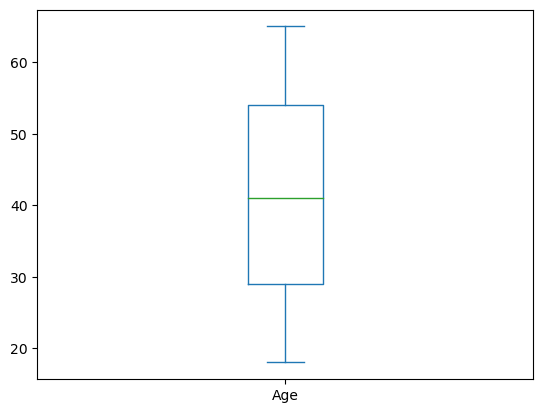

In [20]:
data['Age'].plot(kind='box')
plt.show()

####     The median age is around 40.
    The interquartile range (IQR) (ages between 30 and 50) represents the middle 50% of the data.
    The whiskers indicate that most ages lie between just over 20 and around 60.
    No significant outliers were detected in the age data.

#### This box plot shows a balanced age distribution with no extreme outliers

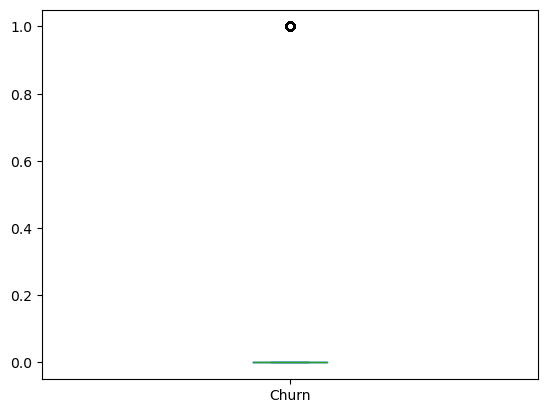

In [21]:
data['Churn'].plot(kind='box')
plt.show()

#### The outlier shown at the top represents the churn cases (1), while the dense area near 0 suggests a higher concentration of non-churn cases (0).
#### The majority of the values are near 0, indicating a low churn rate.
#### A few outliers at the top (possibly 1 values) indicate churn cases.

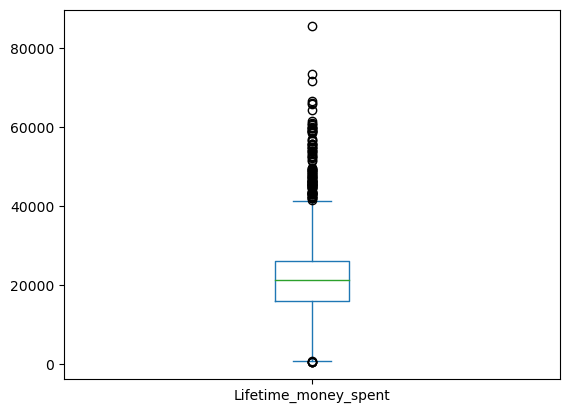

In [22]:
data['Lifetime_money_spent'].plot(kind='box')
plt.show()

####     The median lifetime spending is around 15,000.
    The IQR (middle 50% of spenders) lies between 10,000 and 20,000.
    There are numerous outliers—customers who have spent significantly more than the upper whisker (around 30,000). These customers have spent amounts up to nearly 80,000, indicating some high-value spenders.
    A few outliers also exist at the lower end, close to 0.

#### This indicates that while most customers spend within a moderate range, there are some who spend much more, suggesting a skew in the data towards high spenders.
### we will find if this has some relation with the year of registration or not

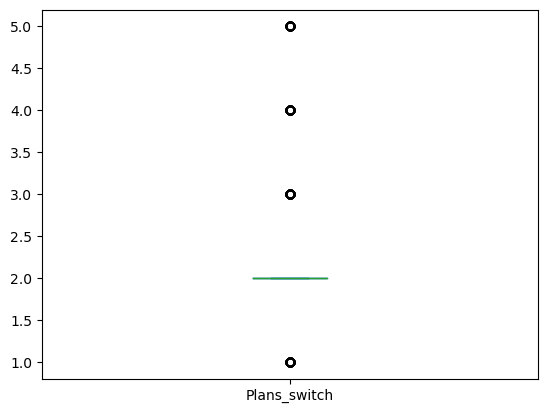

In [23]:
data['Plans_switch'].plot(kind='box')
plt.show()

#### Most of the customers have only switched their plans twice in their entire time with VI whilst there are some who have switched 
#### only once or thrice, four or five times

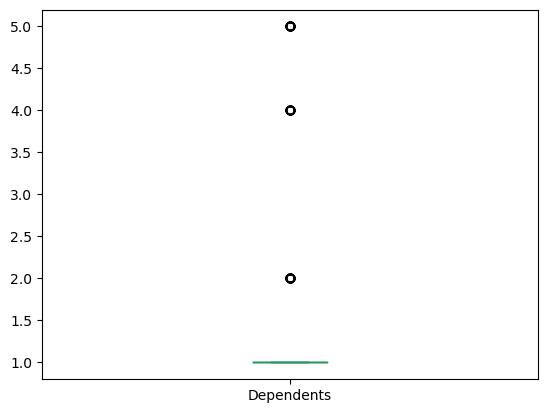

In [24]:
data['Dependents'].plot(kind='box')
plt.show()

#### Most of the dependents data is around the 1 and very small chunk of data is spread out. we can analyse this by figuring out the 
#### plan type they are using

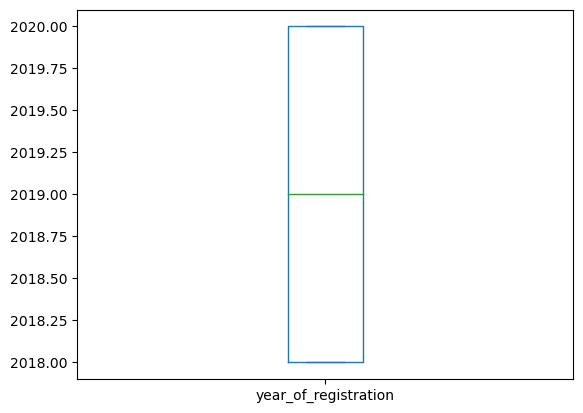

In [25]:
data['year_of_registration'].plot(kind='box')
plt.show()

#### the above plot shows that there were no new registration after the year 2020 and the registration started from 2018 because of the date of incorporation of VI is in 2018

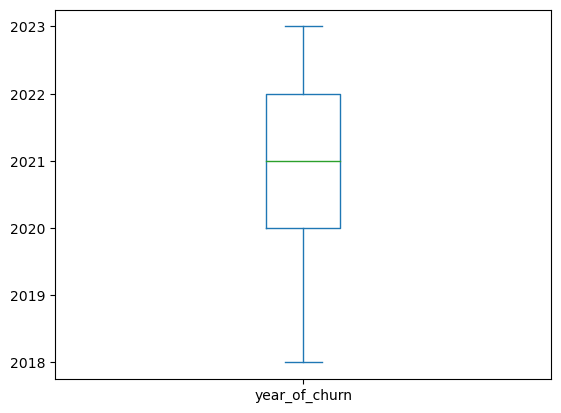

In [26]:
data['year_of_churn'].plot(kind='box')
plt.show()

#### Most churn events occurred between 2020 and 2022, with a median around 2021.
#### The full range of churn spans from 2018 to 2023.

In [28]:
# data['days_of_services'].plot(kind='box')
# plt.show()

#### The majority of the data is clustered between 1000 and 2000 days of service.
#### A significant number of outliers represent shorter durations of service (under 500 days).
#### The median service duration is around 1500 days.

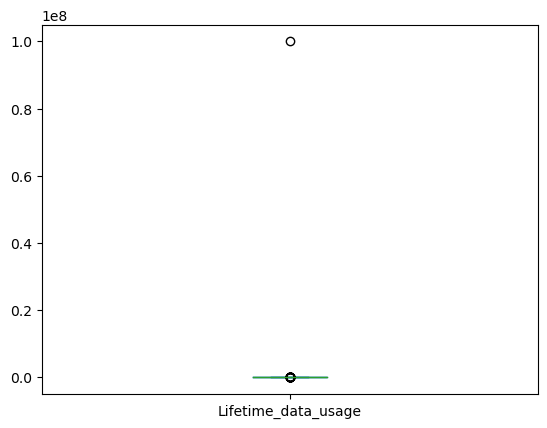

In [29]:
data['Lifetime_data_usage'].plot(kind='box')
plt.show()

#### the box plot shows that the lifetime data usage is generally very low,
#### with a median of 0 and a small interquartile range. The outlier suggests that there may be one or a few individuals with exceptionally high data usage. this might be bacause we set a very high integer value for unlimited data users

# Chceking For Multicollinearatity

In [30]:
# using correlation table
data_without_target_label = data.drop(['Churn'],axis=1,inplace=False)

In [31]:
data_without_target_label.corr()

C:\Users\JUBI RANKA\AppData\Local\Temp\ipykernel_26628\3772322893.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_without_target_label.corr()


,Age,Lifetime_data_usage,Lifetime_money_spent,Plans_switch,Dependents,last_plan_used,year_of_registration,year_of_churn
Age,1.000000,-0.025161,-0.018964,0.020986,0.007892,0.005725,0.003432,-0.012450
Lifetime_data_usage,-0.025161,1.000000,-0.043780,-0.034723,-0.005325,0.033942,-0.020882,-0.068496
Lifetime_money_spent,-0.018964,-0.043780,1.000000,0.056094,0.293605,0.322672,-0.344695,0.630387
Plans_switch,0.020986,-0.034723,0.056094,1.000000,-0.046363,-0.050502,-0.026412,0.234795
Dependents,0.007892,-0.005325,0.293605,-0.046363,1.000000,0.455063,0.005609,-0.043968
last_plan_used,0.005725,0.033942,0.322672,-0.050502,0.455063,1.000000,-0.020698,-0.005793
year_of_registration,0.003432,-0.020882,-0.344695,-0.026412,0.005609,-0.020698,1.000000,0.268610
year_of_churn,-0.012450,-0.068496,0.630387,0.234795,-0.043968,-0.005793,0.268610,1.000000


In [32]:
abs(data_without_target_label.corr())>0.75

C:\Users\JUBI RANKA\AppData\Local\Temp\ipykernel_26628\2663541333.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(data_without_target_label.corr())>0.75


,Age,Lifetime_data_usage,Lifetime_money_spent,Plans_switch,Dependents,last_plan_used,year_of_registration,year_of_churn
Age,True,False,False,False,False,False,False,False
Lifetime_data_usage,False,True,False,False,False,False,False,False
Lifetime_money_spent,False,False,True,False,False,False,False,False
Plans_switch,False,False,False,True,False,False,False,False
Dependents,False,False,False,False,True,False,False,False
last_plan_used,False,False,False,False,False,True,False,False
year_of_registration,False,False,False,False,False,False,True,False
year_of_churn,False,False,False,False,False,False,False,True


In [33]:
# value of correlation lies between -1 to 1 and the value of correlation closer to the extremes, that is -1 and 1, means that
# the data is strongle related to each other and as it comes closer to zero it shows that the realtion is not strong and if it
# is zero it means that there is no relation

In [34]:
# using heatmap

C:\Users\JUBI RANKA\AppData\Local\Temp\ipykernel_26628\1774236473.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_without_target_label.corr(),center = 0, linewidths = 0.8,cmap = "Greens",annot=True)


<Axes: >

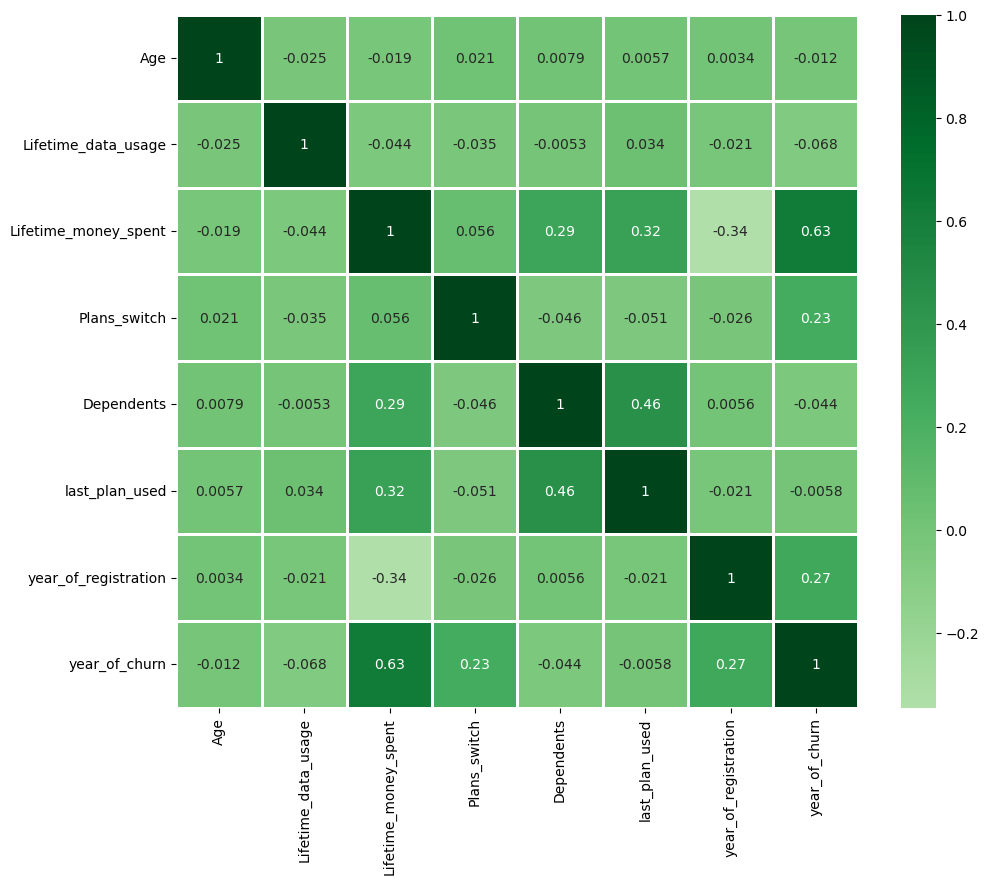

In [35]:
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(data_without_target_label.corr(),center = 0, linewidths = 0.8,cmap = "Greens",annot=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                2000 non-null   object 
 1   Age                   2000 non-null   int64  
 2   Lifetime_data_usage   2000 non-null   int32  
 3   Churn                 2000 non-null   int64  
 4   Lifetime_money_spent  2000 non-null   int64  
 5   Plans_switch          2000 non-null   int64  
 6   Dependents            2000 non-null   int64  
 7   Plan_type             2000 non-null   object 
 8   last_plan_used        2000 non-null   int64  
 9   year_of_registration  2000 non-null   int64  
 10  year_of_churn         483 non-null    float64
dtypes: float64(1), int32(1), int64(7), object(2)
memory usage: 164.2+ KB


# Exploratory Data Analysis

### Univariate Analysis

In [37]:
data.describe(include='object')

,Gender,Plan_type
count,2000,2000
unique,2,2
top,female,Prepaid
freq,1015,1708


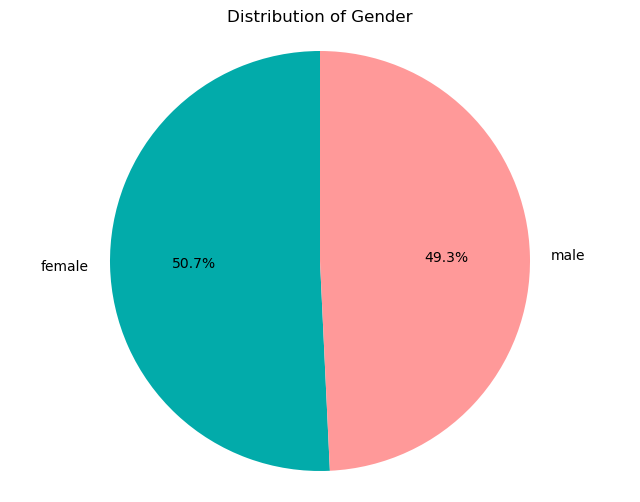

In [38]:
gender = data['Gender'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=90, colors=['#02abaa', '#ff9999'])

# Equal aspect ratio ensures the pie chart is drawn as a circle
plt.axis('equal')

# Title of the pie chart
plt.title('Distribution of Gender')

# Show the pie chart
plt.show()

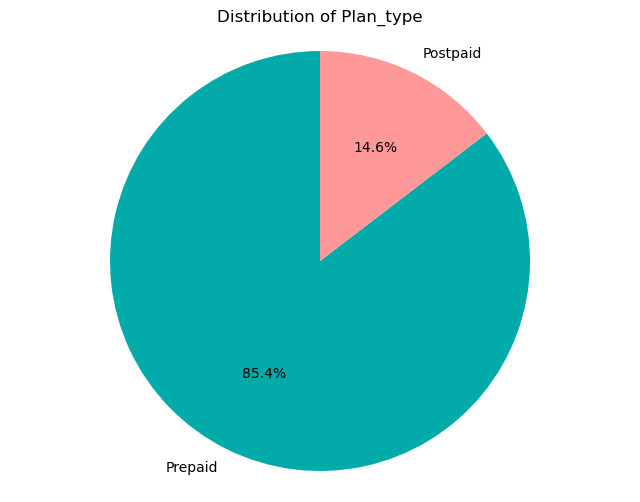

In [39]:
Plan_type = data['Plan_type'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 6))
plt.pie(Plan_type, labels=Plan_type.index, autopct='%1.1f%%', startangle=90, colors=['#02abaa', '#ff9999'])

# Equal aspect ratio ensures the pie chart is drawn as a circle
plt.axis('equal')

# Title of the pie chart
plt.title('Distribution of Plan_type')

# Show the pie chart
plt.show()

### BIvariate Analysis 

In [40]:
# sns.pairplot(data)

In [41]:
# f, ax = plt.subplots(figsize=(11,9))
# sns.heatmap(data.corr(),center = 0, linewidths = 0.8,cmap = "Greens",annot=True)

# Data Transformation

In [42]:
# checking skewness to normalize data
data.skew(axis=0)

C:\Users\JUBI RANKA\AppData\Local\Temp\ipykernel_26628\2356861692.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew(axis=0)


Age                      0.028851
Lifetime_data_usage     44.721327
Churn                    1.208871
Lifetime_money_spent     1.073746
Plans_switch             2.080755
Dependents               4.362081
last_plan_used           0.300869
year_of_registration     0.442533
year_of_churn           -0.277682
dtype: float64

In [43]:
# these features do not require transformation
# Age
# last_plan_used
# year_of_registration
# year_of_churn

In [44]:
# transforming the rest
# Log transformation for high skewness features
data['Log_Lifetime_data_usage'] = np.log(data['Lifetime_data_usage'] + 1)
data['Log_Churn'] = np.log(data['Churn'] + 1)
data['Log_Lifetime_money_spent'] = np.log(data['Lifetime_money_spent'] + 1)
data['Log_Plans_switch'] = np.log(data['Plans_switch'] + 1)
data['Log_Dependents'] = np.log(data['Dependents'] + 1)

### using statistical methods to check normality

In [45]:
from scipy.stats import shapiro

# Checking normality for transformed features
transformed_features = ['Log_Churn', 'Log_Lifetime_data_usage', 'Log_Lifetime_money_spent', 'Log_Plans_switch', 'Log_Dependents']

for feature in transformed_features:
    stat, p = shapiro(data[feature])
    print(f'Shapiro-Wilk Test for {feature}: Statistics={stat:.3f}, p={p:.3f}')
    if p > 0.05:
        print(f'{feature} is likely normally distributed\n')
    else:
        print(f'{feature} is NOT normally distributed\n')

Shapiro-Wilk Test for Log_Churn: Statistics=0.531, p=0.000
Log_Churn is NOT normally distributed

Shapiro-Wilk Test for Log_Lifetime_data_usage: Statistics=0.485, p=0.000
Log_Lifetime_data_usage is NOT normally distributed

Shapiro-Wilk Test for Log_Lifetime_money_spent: Statistics=0.848, p=0.000
Log_Lifetime_money_spent is NOT normally distributed

Shapiro-Wilk Test for Log_Plans_switch: Statistics=0.619, p=0.000
Log_Plans_switch is NOT normally distributed

Shapiro-Wilk Test for Log_Dependents: Statistics=0.267, p=0.000
Log_Dependents is NOT normally distributed



In [46]:
from scipy.stats import normaltest

# Checking normality using D'Agostino's K-squared test
for feature in transformed_features:
    stat, p = normaltest(data[feature])
    print(f"D'Agostino's K-squared Test for {feature}: Statistics={stat:.3f}, p={p:.3f}")
    if p > 0.05:
        print(f'{feature} is likely normally distributed\n')
    else:
        print(f'{feature} is NOT normally distributed\n')


D'Agostino's K-squared Test for Log_Churn: Statistics=361.209, p=0.000
Log_Churn is NOT normally distributed

D'Agostino's K-squared Test for Log_Lifetime_data_usage: Statistics=1301.146, p=0.000
Log_Lifetime_data_usage is NOT normally distributed

D'Agostino's K-squared Test for Log_Lifetime_money_spent: Statistics=886.931, p=0.000
Log_Lifetime_money_spent is NOT normally distributed

D'Agostino's K-squared Test for Log_Plans_switch: Statistics=446.734, p=0.000
Log_Plans_switch is NOT normally distributed

D'Agostino's K-squared Test for Log_Dependents: Statistics=1647.539, p=0.000
Log_Dependents is NOT normally distributed



In [47]:
from scipy.stats import anderson

# Checking normality using Anderson-Darling test
for feature in transformed_features:
    result = anderson(data[feature], dist='norm')
    print(f'Anderson-Darling Test for {feature}: Statistic={result.statistic:.3f}')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'{sl}%: {cv:.3f}, {feature} looks normal')
        else:
            print(f'{sl}%: {cv:.3f}, {feature} does not look normal')
    print()


Anderson-Darling Test for Log_Churn: Statistic=488.204
15.0%: 0.575, Log_Churn does not look normal
10.0%: 0.655, Log_Churn does not look normal
5.0%: 0.785, Log_Churn does not look normal
2.5%: 0.916, Log_Churn does not look normal
1.0%: 1.090, Log_Churn does not look normal

Anderson-Darling Test for Log_Lifetime_data_usage: Statistic=385.036
15.0%: 0.575, Log_Lifetime_data_usage does not look normal
10.0%: 0.655, Log_Lifetime_data_usage does not look normal
5.0%: 0.785, Log_Lifetime_data_usage does not look normal
2.5%: 0.916, Log_Lifetime_data_usage does not look normal
1.0%: 1.090, Log_Lifetime_data_usage does not look normal

Anderson-Darling Test for Log_Lifetime_money_spent: Statistic=74.226
15.0%: 0.575, Log_Lifetime_money_spent does not look normal
10.0%: 0.655, Log_Lifetime_money_spent does not look normal
5.0%: 0.785, Log_Lifetime_money_spent does not look normal
2.5%: 0.916, Log_Lifetime_money_spent does not look normal
1.0%: 1.090, Log_Lifetime_money_spent does not look n

In [48]:
# data.drop(columns=['Lifetime_data_usage', 'Churn', 'Lifetime_money_spent', 'Plans_switch', 'Dependents'],axis =1, inplace=True)


# Label encoding for gender column

In [49]:
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Gender']= label_encoder.fit_transform(data['Gender']) 
  
data['Gender'].unique() 

# A label with a high value may be considered to have high priority than a label having a lower value.

array([0, 1])

# Label encoding for Plan_type column

In [50]:
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Plan_type']= label_encoder.fit_transform(data['Plan_type']) 
  
data['Plan_type'].unique() 

# A label with a high value may be considered to have high priority than a label having a lower value.

array([0, 1])

In [51]:
data.head()

,Gender,Age,Lifetime_data_usage,Churn,Lifetime_money_spent,Plans_switch,Dependents,Plan_type,last_plan_used,year_of_registration,year_of_churn,Log_Lifetime_data_usage,Log_Churn,Log_Lifetime_money_spent,Log_Plans_switch,Log_Dependents
0,0,57,5616,0,31837,2,1,0,27,2018,NaN,8.633553,0.000000,10.368416,1.098612,0.693147
1,0,38,3700,1,26854,2,1,0,27,2018,2023.0,8.216358,0.693147,10.198207,1.098612,0.693147
2,1,40,4368,0,25148,2,1,1,24,2018,NaN,8.382289,0.000000,10.132573,1.098612,0.693147
3,1,39,1684,1,9226,2,1,1,22,2018,2020.0,7.429521,0.693147,9.129889,1.098612,0.693147
4,0,19,4816,0,27130,3,1,1,10,2018,NaN,8.479907,0.000000,10.208432,1.386294,0.693147


## defining print_score_function

In [52]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [53]:
data['Churn'] = data['Churn'].astype('category')

# Extracting X and y

In [54]:
X = data.drop(['Lifetime_data_usage', 'Churn', 'Lifetime_money_spent', 'Plans_switch', 'Dependents','Log_Churn','year_of_churn'],axis=1,inplace=False)
y = data['Churn']
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    2000 non-null   int32  
 1   Age                       2000 non-null   int64  
 2   Plan_type                 2000 non-null   int32  
 3   last_plan_used            2000 non-null   int64  
 4   year_of_registration      2000 non-null   int64  
 5   Log_Lifetime_data_usage   2000 non-null   float64
 6   Log_Lifetime_money_spent  2000 non-null   float64
 7   Log_Plans_switch          2000 non-null   float64
 8   Log_Dependents            2000 non-null   float64
dtypes: float64(4), int32(2), int64(3)
memory usage: 125.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: Churn
Non-Null Count  Dtype   
--------------  -----   
2000 non-null   category
dtypes: category(1)
memory usage: 2.2 KB


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.30, random_state = 42)

In [56]:
# y_train = y_train.astype('category')


# Scaling the Features

#### standard Scaling

In [57]:
# standard scaling
st_x= StandardScaler()    
X_train_st= st_x.fit_transform(X_train)    
X_test_st= st_x.transform(X_test) 

#### MinMax Scaling

In [58]:
# MinMaxScaler
MM_scaler = MinMaxScaler()
X_train_MM = MM_scaler.fit_transform(X_train)
X_test_MM = MM_scaler.transform(X_test)

# Cross Validation

In [59]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Logistic Regression

### Without scaled features

In [60]:
# without scaled features
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

C:\Users\JUBI RANKA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [61]:
print_score(lr, X_train, y_train, X_test, y_test, train=True)
print_score(lr, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.71%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.885618    0.895735  0.887143     0.890676      0.887967
recall        0.979535    0.581538  0.887143     0.780537      0.887143
f1-score      0.930212    0.705224  0.887143     0.817718      0.877983
support    1075.000000  325.000000  0.887143  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1053   22]
 [ 136  189]]

Test Result:
Accuracy Score: 86.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.855731    0.904255  0.863333    0.879993      0.868509
recall       0.979638    0.537975  0.863333    0.758806      0.863333
f1-score     0.913502    0.674603  0.863333    0.794053      0.850592
support    442.000000  158.000000  0.863333  600.

In [62]:
# the first accuracy is for the training data and the second is for the testing data
# it clearly shows that the accuracy is very less so we will have to try other models

In [63]:
# performing cross validation to train the data better
cross_val_results_lr = cross_val_score(lr, X, y, cv=kf)

C:\Users\JUBI RANKA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JUBI RANKA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [64]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results_lr}')
print(f'Mean Accuracy: {cross_val_results_lr.mean()}')

Cross-Validation Results (Accuracy): [0.8425 0.8925 0.8975 0.8625 0.8725]
Mean Accuracy: 0.8734999999999999


In [65]:
# This prints the accuracy score obtained from each fold of the cross-validation.

In [66]:
# the accuracy scores are still low, even after doing cross validation therefore we would not conisder logistic regression model

### With standardScaled Features

In [ ]:
lr.fit(X_train_st, y_train)

In [ ]:
print_score(lr, X_train_st, y_train, X_test_st, y_test, train=True)
print_score(lr, X_train_st, y_train, X_test_st, y_test, train=False)

Train Result:
Accuracy Score: 92.14%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.912746    0.965368  0.921429     0.939057      0.924962
recall        0.992558    0.686154  0.921429     0.839356      0.921429
f1-score      0.950980    0.802158  0.921429     0.876569      0.916432
support    1075.000000  325.000000  0.921429  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1067    8]
 [ 102  223]]

Test Result:
Accuracy Score: 90.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.889796    0.945455       0.9    0.917625      0.904453
recall       0.986425    0.658228       0.9    0.822327      0.900000
f1-score     0.935622    0.776119       0.9    0.855871      0.893620
support    442.000000  158.000000       0.9  600.

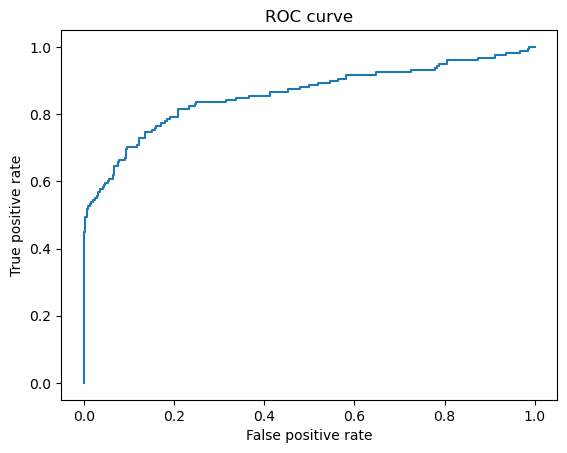

In [111]:
# AUC ROC CURVE
y_predprob=lr.predict_proba(X_test_st)
fpr,tpr,threshold = roc_curve(y_test,y_predprob[:,1])
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.savefig('ROC_curve.png')

In [112]:
auc(fpr,tpr)

0.8583824961337991

### With MinMaxScaler

In [69]:
lr.fit(X_train_MM, y_train)

LogisticRegression(random_state=0)

In [70]:
print_score(lr, X_train_MM, y_train, X_test_MM, y_test, train=True)
print_score(lr, X_train_MM, y_train, X_test_MM, y_test, train=False)

Train Result:
Accuracy Score: 86.50%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.851030    0.992754     0.865     0.921892      0.883930
recall        0.999070    0.421538     0.865     0.710304      0.865000
f1-score      0.919127    0.591793     0.865     0.755460      0.843139
support    1075.000000  325.000000     0.865  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1074    1]
 [ 188  137]]

Test Result:
Accuracy Score: 85.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.830827    1.00000      0.85    0.915414      0.875376
recall       1.000000    0.43038      0.85    0.715190      0.850000
f1-score     0.907598    0.60177      0.85    0.754684      0.827063
support    442.000000  158.00000      0.85  600.00000

# Decision Tree

In [72]:
# without using scaled features
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
# print_score(dtree, X_train, y_train, X_test, y_test, train=True)
# print_score(dtree, X_train, y_train, X_test, y_test, train=False)

In [74]:
# features = X.columns
# tree.plot_tree(dtree, feature_names=features)

In [75]:
# step 4: predicting
y_pred = dtree.predict(X_test)

# step 5: model performance evaluation (accuracy)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print('Accuracy:', round(accuracy, 2))
print('Precision:', round(precision, 2))
print('Recall:', round(recall, 2))

Accuracy: 0.86
Precision: 0.74
Recall: 0.72


In [76]:
cross_val_results_dtree = cross_val_score(dtree, X, y, cv=kf)

In [77]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results_dtree}')
print(f'Mean Accuracy: {cross_val_results_dtree.mean()}')

Cross-Validation Results (Accuracy): [0.85   0.8725 0.89   0.8425 0.8625]
Mean Accuracy: 0.8634999999999999


In [78]:
# model has an accuracy of 66%, meaning it correctly predicts the target in 66% of cases.
# However, the precision and recall are both very low at 20% and 23%, respectively. This indicates that:

#     Precision is low: The model makes many false positive predictions, labeling non-positive instances as positive.
#     Recall is low: The model misses many true positives, meaning it's not good at identifying the positive class 
#     (e.g., "churn" cases, if that’s the target).

# The cross-validation accuracy confirms that the model is performing consistently across multiple data splits, with an 
# average accuracy of around 66%

In [79]:
# to avoid overfitting of the model 

### Using standard scalar

In [80]:
dtree.fit(X_train_st, y_train)

DecisionTreeClassifier()

In [81]:
# step 4: predicting
y_pred_st = dtree.predict(X_test_st)

# step 5: model performance evaluation (accuracy)
accuracy = accuracy_score(y_test, y_pred_st)
precision = precision_score(y_test, y_pred_st)
recall = recall_score(y_test, y_pred_st)

# Print results
print('Accuracy:', round(accuracy, 2))
print('Precision:', round(precision, 2))
print('Recall:', round(recall, 2))

Accuracy: 0.86
Precision: 0.75
Recall: 0.72


# Random forest classifier

## Using Gini Index

### without scaled features

In [82]:
# using gini to split
RFclassifier= RandomForestClassifier(n_estimators= 10, criterion="gini")  
RFclassifier.fit(X_train, y_train)  

RandomForestClassifier(n_estimators=10)

In [83]:
print_score(RFclassifier, X_train, y_train, X_test, y_test, train=True)
print_score(RFclassifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.79%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.984432    1.000000  0.987857     0.992216      0.988046
recall        1.000000    0.947692  0.987857     0.973846      0.987857
f1-score      0.992155    0.973144  0.987857     0.982649      0.987742
support    1075.000000  325.000000  0.987857  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1075    0]
 [  17  308]]

Test Result:
Accuracy Score: 88.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.879098    0.883929      0.88    0.881513      0.880370
recall       0.970588    0.626582      0.88    0.798585      0.880000
f1-score     0.922581    0.733333      0.88    0.827957      0.872746
support    442.000000  158.000000      0.88  600.

### Using standard Scaler

In [84]:
RFclassifier.fit(X_train_st, y_train) 
print_score(RFclassifier, X_train_st, y_train, X_test_st, y_test, train=True)
print_score(RFclassifier, X_train_st, y_train, X_test_st, y_test, train=False)

Train Result:
Accuracy Score: 98.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.985335    1.000000  0.988571     0.992667      0.988739
recall        1.000000    0.950769  0.988571     0.975385      0.988571
f1-score      0.992613    0.974763  0.988571     0.983688      0.988469
support    1075.000000  325.000000  0.988571  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1075    0]
 [  16  309]]

Test Result:
Accuracy Score: 87.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.873727    0.880734     0.875    0.877231      0.875572
recall       0.970588    0.607595     0.875    0.789092      0.875000
f1-score     0.919614    0.719101     0.875    0.819358      0.866812
support    442.000000  158.000000     0.875  600.

### Using MinMaxScaler

In [85]:
RFclassifier.fit(X_train_MM, y_train) 
print_score(RFclassifier, X_train_MM, y_train, X_test_MM, y_test, train=True)
print_score(RFclassifier, X_train_MM, y_train, X_test_MM, y_test, train=False)

Train Result:
Accuracy Score: 99.07%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.988051    1.000000  0.990714     0.994026      0.990825
recall        1.000000    0.960000  0.990714     0.980000      0.990714
f1-score      0.993990    0.979592  0.990714     0.986791      0.990647
support    1075.000000  325.000000  0.990714  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1075    0]
 [  13  312]]

Test Result:
Accuracy Score: 88.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.884536    0.886957     0.885    0.885746      0.885173
recall       0.970588    0.645570     0.885    0.808079      0.885000
f1-score     0.925566    0.747253     0.885    0.836410      0.878610
support    442.000000  158.000000     0.885  600.

In [86]:
# the model is overfit as it shows good accuracy with training data but not with testing data

## Using Entropy

### Without using any scaling 

In [87]:
# using entrpoy to split the tree
RFEclassifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
RFEclassifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [88]:
print_score(RFEclassifier, X_train, y_train, X_test, y_test, train=True)
print_score(RFEclassifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.00%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.987144    1.000000      0.99     0.993572      0.990129
recall        1.000000    0.956923      0.99     0.978462      0.990000
f1-score      0.993530    0.977987      0.99     0.985759      0.989922
support    1075.000000  325.000000      0.99  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1075    0]
 [  14  311]]

Test Result:
Accuracy Score: 88.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.883817    0.864407      0.88    0.874112      0.878706
recall       0.963801    0.645570      0.88    0.804685      0.880000
f1-score     0.922078    0.739130      0.88    0.830604      0.873902
support    442.000000  158.000000      0.88  600.

In [89]:
# it shows similar results as with gini index therefore trying cross validation to train the data better to 
# overcome the problem of overfitting

### Using Standard Scaler

In [90]:
RFEclassifier.fit(X_train_st, y_train) 
print_score(RFEclassifier, X_train_st, y_train, X_test_st, y_test, train=True)
print_score(RFEclassifier, X_train_st, y_train, X_test_st, y_test, train=False)

Train Result:
Accuracy Score: 99.00%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.987144    1.000000      0.99     0.993572      0.990129
recall        1.000000    0.956923      0.99     0.978462      0.990000
f1-score      0.993530    0.977987      0.99     0.985759      0.989922
support    1075.000000  325.000000      0.99  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1075    0]
 [  14  311]]

Test Result:
Accuracy Score: 88.67%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.891213    0.868852  0.886667    0.880033      0.885325
recall       0.963801    0.670886  0.886667    0.817343      0.886667
f1-score     0.926087    0.757143  0.886667    0.841615      0.881598
support    442.000000  158.000000  0.886667  600.

### Using MinMaxScaler 

In [91]:
RFEclassifier.fit(X_train_MM, y_train) 
print_score(RFEclassifier, X_train_MM, y_train, X_test_MM, y_test, train=True)
print_score(RFEclassifier, X_train_MM, y_train, X_test_MM, y_test, train=False)

Train Result:
Accuracy Score: 98.43%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.980822    0.996721  0.984286     0.988772      0.984513
recall        0.999070    0.935385  0.984286     0.967227      0.984286
f1-score      0.989862    0.965079  0.984286     0.977471      0.984109
support    1075.000000  325.000000  0.984286  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1074    1]
 [  21  304]]

Test Result:
Accuracy Score: 89.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.880567    0.933962      0.89    0.907265      0.894628
recall       0.984163    0.626582      0.89    0.805373      0.890000
f1-score     0.929487    0.750000      0.89    0.839744      0.882222
support    442.000000  158.000000      0.89  600.

In [92]:
# for gini index
cross_val_results_RF = cross_val_score(RFclassifier, X, y, cv=kf)

In [93]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results_RF}')
print(f'Mean Accuracy: {cross_val_results_RF.mean()}')

Cross-Validation Results (Accuracy): [0.885  0.91   0.9275 0.89   0.905 ]
Mean Accuracy: 0.9035


In [94]:
# for  entropy
cross_val_results_RFE = cross_val_score(RFEclassifier, X, y, cv=kf)

In [95]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results_RFE}')
print(f'Mean Accuracy: {cross_val_results_RFE.mean()}')

Cross-Validation Results (Accuracy): [0.885  0.9125 0.9325 0.905  0.9125]
Mean Accuracy: 0.9094999999999999


In [96]:
# Random forest has also given the maximum accuracy of 79% which is not the best

# Suport Vector Machine

### without using scaled features

In [97]:
clfSVC = SVC(kernel='linear') 
clfSVC.fit(X_train, y_train) 

SVC(kernel='linear')

In [98]:
print_score(clfSVC, X_train, y_train, X_test, y_test, train=True)
print_score(clfSVC, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.07%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.890000    0.965000  0.900714     0.927500      0.907411
recall        0.993488    0.593846  0.900714     0.793667      0.900714
f1-score      0.938901    0.735238  0.900714     0.837070      0.891622
support    1075.000000  325.000000  0.900714  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1068    7]
 [ 132  193]]

Test Result:
Accuracy Score: 88.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.870518    0.948980  0.883333    0.909749      0.891179
recall       0.988688    0.588608  0.883333    0.788648      0.883333
f1-score     0.925847    0.726562  0.883333    0.826205      0.873369
support    442.000000  158.000000  0.883333  600.

### Using Standard Scaler

In [99]:
clfSVC.fit(X_train_st, y_train) 
print_score(clfSVC, X_train_st, y_train, X_test_st, y_test, train=True)
print_score(clfSVC, X_train_st, y_train, X_test_st, y_test, train=False)

Train Result:
Accuracy Score: 92.07%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.908475    0.986364  0.920714     0.947419      0.926556
recall        0.997209    0.667692  0.920714     0.832451      0.920714
f1-score      0.950776    0.796330  0.920714     0.873553      0.914923
support    1075.000000  325.000000  0.920714  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1072    3]
 [ 108  217]]

Test Result:
Accuracy Score: 89.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.882828    0.952381     0.895    0.917605      0.901144
recall       0.988688    0.632911     0.895    0.810800      0.895000
f1-score     0.932764    0.760456     0.895    0.846610      0.887390
support    442.000000  158.000000     0.895  600.

### Using MinMaxScaler 

In [100]:
clfSVC.fit(X_train_MM, y_train) 
print_score(clfSVC, X_train_MM, y_train, X_test_MM, y_test, train=True)
print_score(clfSVC, X_train_MM, y_train, X_test_MM, y_test, train=False)

Train Result:
Accuracy Score: 88.57%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.871046    0.994012  0.885714     0.932529      0.899592
recall        0.999070    0.510769  0.885714     0.754919      0.885714
f1-score      0.930676    0.674797  0.885714     0.802736      0.871275
support    1075.000000  325.000000  0.885714  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1074    1]
 [ 159  166]]

Test Result:
Accuracy Score: 86.67%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.846743    1.000000  0.866667    0.923372      0.887101
recall       1.000000    0.493671  0.866667    0.746835      0.866667
f1-score     0.917012    0.661017  0.866667    0.789015      0.849600
support    442.000000  158.000000  0.866667  600.

In [101]:
# performing cross validation to train the data better
cross_val_results_clfSVC = cross_val_score(clfSVC, X, y, cv=kf)

In [102]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results_clfSVC}')
print(f'Mean Accuracy: {cross_val_results_clfSVC.mean()}')

Cross-Validation Results (Accuracy): [0.865  0.9025 0.91   0.8975 0.87  ]
Mean Accuracy: 0.889


# KNN

### without using scaled features

In [103]:
knn = KNeighborsClassifier(n_neighbors= int(math.sqrt(2000) / 2))
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=22)

In [104]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 76.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.773091    0.520000  0.768571     0.646545      0.714338
recall        0.988837    0.040000  0.768571     0.514419      0.768571
f1-score      0.867755    0.074286  0.768571     0.471020      0.683557
support    1075.000000  325.000000  0.768571  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1063   12]
 [ 312   13]]

Test Result:
Accuracy Score: 73.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.737374    0.333333  0.733333    0.535354      0.630976
recall       0.990950    0.012658  0.733333    0.501804      0.733333
f1-score     0.845560    0.024390  0.733333    0.434975      0.629319
support    442.000000  158.000000  0.733333  600.

### Using Standard Scaler

In [105]:
knn.fit(X_train_st, y_train) 
print_score(knn, X_train_st, y_train, X_test_st, y_test, train=True)
print_score(knn, X_train_st, y_train, X_test_st, y_test, train=False)

Train Result:
Accuracy Score: 85.57%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.841817    1.000000  0.855714     0.920908      0.878538
recall        1.000000    0.378462  0.855714     0.689231      0.855714
f1-score      0.914116    0.549107  0.855714     0.731611      0.829382
support    1075.000000  325.000000  0.855714  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1075    0]
 [ 202  123]]

Test Result:
Accuracy Score: 82.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.806569    1.000000  0.823333    0.903285      0.857506
recall       1.000000    0.329114  0.823333    0.664557      0.823333
f1-score     0.892929    0.495238  0.823333    0.694084      0.788204
support    442.000000  158.000000  0.823333  600.

### Using MinMaxScaler 

In [106]:
knn.fit(X_train_MM, y_train) 
print_score(knn, X_train_MM, y_train, X_test_MM, y_test, train=True)
print_score(knn, X_train_MM, y_train, X_test_MM, y_test, train=False)

Train Result:
Accuracy Score: 78.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.784514    0.967742  0.788571     0.876128      0.827049
recall        0.999070    0.092308  0.788571     0.545689      0.788571
f1-score      0.878887    0.168539  0.788571     0.523713      0.713985
support    1075.000000  325.000000  0.788571  1400.000000   1400.000000
_______________________________________________
Confusion Matrix: 
 [[1074    1]
 [ 295   30]]

Test Result:
Accuracy Score: 76.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.756849    1.000000  0.763333    0.878425      0.820879
recall       1.000000    0.101266  0.763333    0.550633      0.763333
f1-score     0.861598    0.183908  0.763333    0.522753      0.683140
support    442.000000  158.000000  0.763333  600.

In [107]:
# performing cross validation to train the data better
cross_val_results_knn = cross_val_score(knn, X, y, cv=kf)

In [108]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results_knn}')
print(f'Mean Accuracy: {cross_val_results_knn.mean()}')

Cross-Validation Results (Accuracy): [0.72   0.7725 0.79   0.74   0.7575]
Mean Accuracy: 0.756
